In [2]:
! pip install wget
! pip install pandas
! pip install openpyxl
! pip install matplotlib
! pip install seaborn

import wget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#L ista de URLs dos arquivos a serem baixados
urls = [
    'https://www.sspds.ce.gov.br/wp-content/uploads/sites/24/2024/06/CVLI_2009-a-2023.xlsx'
]

# Baixando arquivos
for url in urls:
    wget.download(url)
    print(f"Baixado: {url.split('/')[-1]}")
    


Baixado: CVLI_2009-a-2023.xlsx


In [3]:
# Carregar os dados das planilhas
df= cvli_0923 = pd.read_excel('CVLI_2009-a-2023.xlsx')
cvli_0923.head(100)

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
0,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Outros meios,Masculino,54,Não Informada,Não Informada
1,Quixadá,AIS 20,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,32,Não Informada,Não Informada
2,Baturité,AIS 15,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,28,Não Informada,Não Informada
3,Maracanaú,AIS 12,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,19,Não Informada,Não Informada
4,Maranguape,AIS 24,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,39,Não Informada,Não Informada
...,...,...,...,...,...,...,...,...,...,...,...
95,Fortaleza,AIS 07,HOMICIDIO DOLOSO,2009-01-12,00:00:00,Segunda,Arma de fogo,Masculino,16,Não Informada,Não Informada
96,Fortaleza,AIS 06,HOMICIDIO DOLOSO,2009-01-12,00:00:00,Segunda,Arma branca,Masculino,42,Não Informada,Não Informada
97,Ubajara,AIS 14,LESAO CORPORAL SEGUIDA DE MORTE,2009-01-12,15:00:00,Segunda,Arma de fogo,Masculino,19,Alfabetizado,Não Informada
98,Crato,AIS 19,HOMICIDIO DOLOSO,2009-01-13,00:00:00,Terça,Arma de fogo,Masculino,33,Não Informada,Não Informada


In [4]:
#Obter informações básicas sobre o DataFrame, incluindo tipos de dados e valores nulos:
cvli_0923.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53047 entries, 0 to 53046
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Município               53047 non-null  object        
 1   AIS                     53047 non-null  object        
 2   Natureza                53047 non-null  object        
 3   Data                    53047 non-null  datetime64[ns]
 4   Hora                    53047 non-null  object        
 5   Dia da Semana           53047 non-null  object        
 6   Meio Empregado          53047 non-null  object        
 7   Gênero                  53047 non-null  object        
 8   Idade da Vítima         53047 non-null  object        
 9   Escolaridade da Vítima  53047 non-null  object        
 10  Raça da Vítima          53047 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 4.5+ MB


In [5]:
#estatica descritiva de cada coluna do DataFrame:
cvli_0923.describe()

,Data
count,53047
mean,2016-08-01 14:56:17.879992832
min,2009-01-01 00:00:00
25%,2013-05-24 00:00:00
50%,2016-08-08 00:00:00
75%,2020-01-02 00:00:00
max,2023-12-31 00:00:00


In [6]:
#tratamento de dados dos valores nulos
# Verificar quantidade de valores nulos em cada coluna
cvli_0923.isnull().sum()

#remove as linhas com valores nulos
cvli_0923.dropna()

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
0,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Outros meios,Masculino,54,Não Informada,Não Informada
1,Quixadá,AIS 20,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,32,Não Informada,Não Informada
2,Baturité,AIS 15,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,28,Não Informada,Não Informada
3,Maracanaú,AIS 12,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,19,Não Informada,Não Informada
4,Maranguape,AIS 24,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,39,Não Informada,Não Informada
...,...,...,...,...,...,...,...,...,...,...,...
53042,Fortaleza,AIS 03,HOMICIDIO DOLOSO,2023-12-31,22:59:59.971000,Domingo,Arma de fogo,Masculino,27,Ensino Médio Completo,Branca
53043,Boa Viagem,AIS 15,HOMICIDIO DOLOSO,2023-12-31,22:59:59.971000,Domingo,Arma branca,Masculino,58,Não Alfabetizado,Parda
53044,Maracanaú,AIS 12,HOMICIDIO DOLOSO,2023-12-31,23:30:00.029000,Domingo,Arma de fogo,Masculino,42,Ensino Fundamental Completo,Branca
53045,Maracanaú,AIS 12,HOMICIDIO DOLOSO,2023-12-31,23:30:00.029000,Domingo,Arma de fogo,Feminino,46,Ensino Médio Completo,Parda


In [7]:
# Converter a coluna 'Data' para datetime, lidando com erros
cvli_0923['Data'] = pd.to_datetime(cvli_0923['Data'], errors='coerce')

# Converter a coluna 'Hora' para datetime, assumindo formato HH:MM:SS
cvli_0923['Hora'] = pd.to_datetime(cvli_0923['Hora'], format='%H:%M:%S', errors='coerce').dt.time

print(cvli_0923[['Data', 'Hora']].head())


        Data      Hora
0 2009-01-01  00:00:00
1 2009-01-01  00:00:00
2 2009-01-01  00:00:00
3 2009-01-01  00:00:00
4 2009-01-01  00:00:00


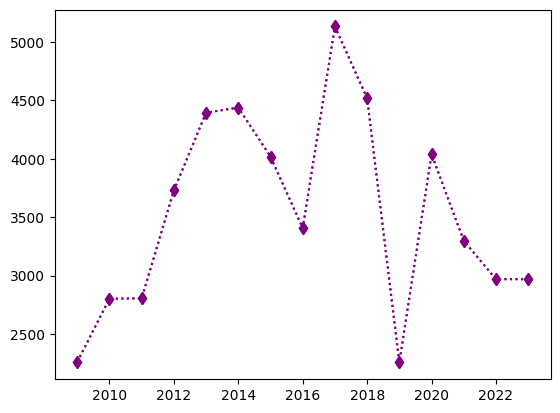

In [8]:
import matplotlib.pyplot as plt
# Converter a coluna 'Data' para datetime e extrair o ano
cvli_0923['Data'] = pd.to_datetime(cvli_0923['Data'], errors='coerce')
cvli_0923['Ano'] = cvli_0923['Data'].dt.year
# Agrupar por ano e contar os incidentes
cvli_ano = cvli_0923.groupby('Ano').size()
#plotar tendendicas 
plt.plot(cvli_ano.index, cvli_ano.values, marker='d', linestyle=':', color='purple', label='CVLI')
plt.plot(cvli_ano.index, cvli_ano.values, marker='d', linestyle=':', color='purple', label='CVLI')


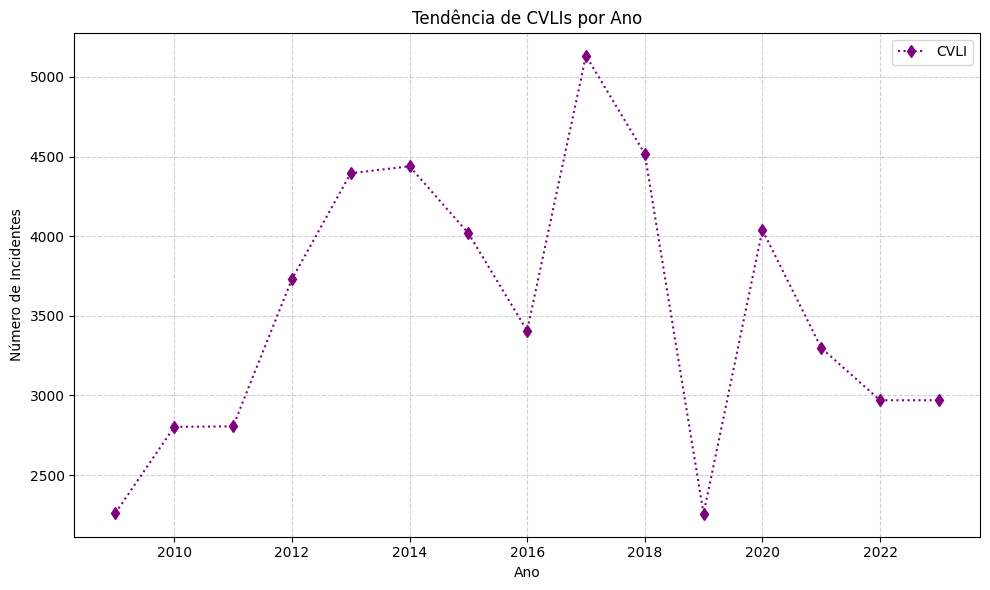

In [9]:
# Converter a coluna 'Data' para datetime e extrair o ano
cvli_0923['Data'] = pd.to_datetime(cvli_0923['Data'], errors='coerce')
cvli_0923['Ano'] = cvli_0923['Data'].dt.year

# Agrupar por ano e contar os incidentes
cvli_ano = cvli_0923.groupby('Ano').size()

# Plotar tendências
plt.figure(figsize=(10, 6))
plt.plot(cvli_ano.index, cvli_ano.values, marker='d', linestyle=':', color='purple', label='CVLI')
plt.title('Tendência de CVLIs por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Incidentes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

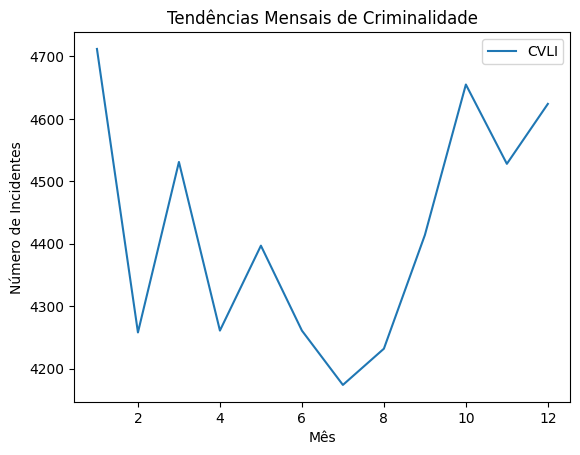

In [10]:
# Extrair mês e contar incidentes por mês
cvli_0923['Mês'] = cvli_0923['Data'].dt.month
#agrupar por mes 
cvli_mes = cvli_0923.groupby('Mês').size()
plt.plot(cvli_mes.index, cvli_mes.values, label='CVLI')
plt.xlabel('Mês')
plt.ylabel('Número de Incidentes')
plt.title('Tendências Mensais de Criminalidade')
plt.legend()
plt.show()

In [11]:
# agrupar por municipio
cvli_municipio = cvli_0923.groupby('Município').size()
cvli_municipio_df = cvli_municipio.reset_index(name='Número de Incidentes')
cvli_0923.columns = cvli_0923.columns.str.strip()  # Remove espaços extras
print(cvli_municipio_df.head())


  Município  Número de Incidentes
0   Abaiara                    18
1   Acarape                   111
2    Acaraú                   173
3  Acopiara                   227
4    Aiuaba                    41


In [12]:
# Agrupar por município e contar o número de incidentes
cvli_municipio = cvli_0923.groupby('Município').size()

# Resetar o índice e renomear a coluna com os incidentes
cvli_municipio_df = cvli_municipio.reset_index(name='Número de Incidentes')

# Ordenar pelo número de incidentes em ordem decrescente
cvli_municipio_df = cvli_municipio_df.sort_values(by='Número de Incidentes', ascending=False)

# Selecionar os top 10 municípios
cvli_top_10_municipios = cvli_municipio_df.head(10)

#titulo
print("Top 10 Municípios com Mais Incidentes de CVLI:")

# Exibir os resultados
print(cvli_top_10_municipios)


Top 10 Municípios com Mais Incidentes de CVLI:
             Município  Número de Incidentes
58           Fortaleza                 19679
43             Caucaia                  3558
103          Maracanaú                  2459
98   Juazeiro do Norte                  1513
162             Sobral                  1138
11             Aquiraz                   913
104         Maranguape                   845
126            Pacajus                   724
70           Horizonte                   716
50               Crato                   660


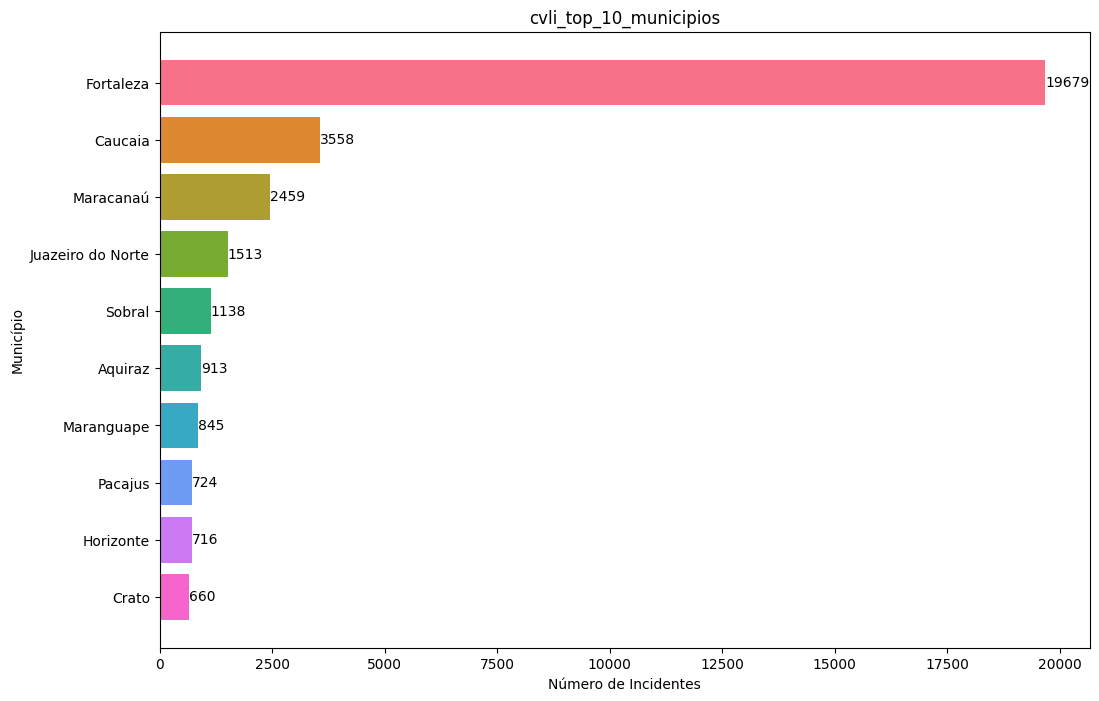

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 8))
cvli_municipio_df = cvli_municipio_df.sort_values(by='Número de Incidentes', ascending=False)
df_top_10 = cvli_municipio_df.head(10)  # Selecionar os top 10 municípios

# Gerar uma paleta de cores distinta para os top 10 municípios
colors = sns.color_palette("husl", len(df_top_10))

# Plotar as barras horizontais
bars = plt.barh(df_top_10['Município'], df_top_10['Número de Incidentes'], color=colors)

# Adicionar os valores às barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}',va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Número de Incidentes')
plt.ylabel('Município')
plt.title("cvli_top_10_municipios")
plt.gca().invert_yaxis()
plt.show()


In [14]:
! pip install keras 
! pip install tensorflow 

In [15]:
df= cvli_0923 = pd.read_excel('CVLI_2009-a-2023.xlsx')
# Supondo que cvli_0923 seja seu DataFrame
cvli_0923['Data'] = pd.to_datetime(cvli_0923['Data'], errors='coerce')  # Converte a coluna Data para datetime

# Adiciona a coluna 'Ano' extraída da coluna 'Data'
cvli_0923['Ano'] = cvli_0923['Data'].dt.year

# Exibe o DataFrame com a nova coluna 'Ano'
cvli_0923.head(100)

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima,Ano
0,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Outros meios,Masculino,54,Não Informada,Não Informada,2009
1,Quixadá,AIS 20,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,32,Não Informada,Não Informada,2009
2,Baturité,AIS 15,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,28,Não Informada,Não Informada,2009
3,Maracanaú,AIS 12,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,19,Não Informada,Não Informada,2009
4,Maranguape,AIS 24,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,39,Não Informada,Não Informada,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Fortaleza,AIS 07,HOMICIDIO DOLOSO,2009-01-12,00:00:00,Segunda,Arma de fogo,Masculino,16,Não Informada,Não Informada,2009
96,Fortaleza,AIS 06,HOMICIDIO DOLOSO,2009-01-12,00:00:00,Segunda,Arma branca,Masculino,42,Não Informada,Não Informada,2009
97,Ubajara,AIS 14,LESAO CORPORAL SEGUIDA DE MORTE,2009-01-12,15:00:00,Segunda,Arma de fogo,Masculino,19,Alfabetizado,Não Informada,2009
98,Crato,AIS 19,HOMICIDIO DOLOSO,2009-01-13,00:00:00,Terça,Arma de fogo,Masculino,33,Não Informada,Não Informada,2009


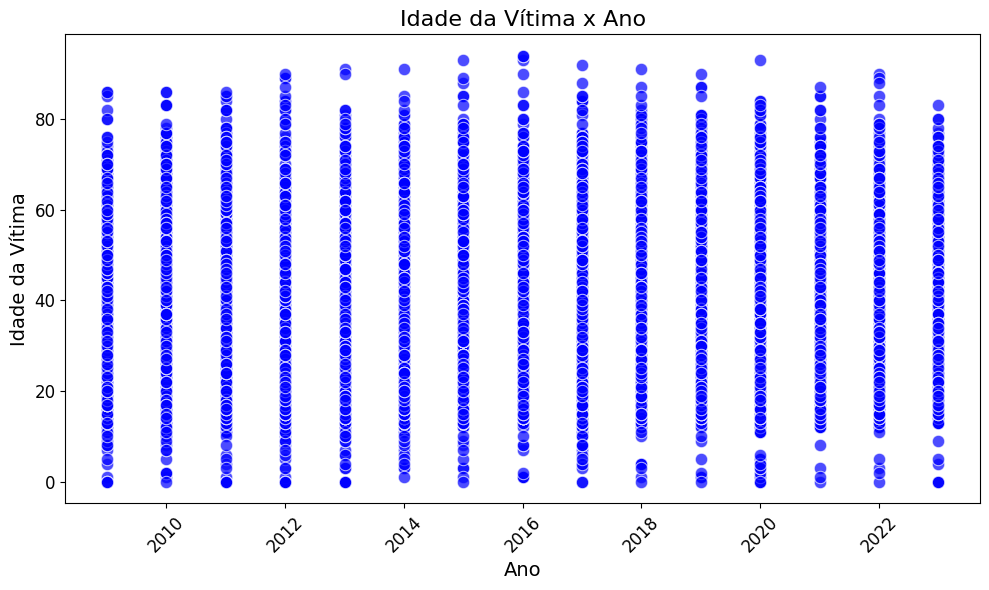

In [ ]:
# Convertendo a coluna 'Idade da Vítima' para numérico, forçando os erros a se tornarem NaN
cvli_0923['Idade da Vítima'] = pd.to_numeric(cvli_0923['Idade da Vítima'], errors='coerce')
# Configurações do gráfico
plt.figure(figsize=(10, 6))

# Criando o gráfico de dispersão
sns.scatterplot(data=cvli_0923, x='Ano', y='Idade da Vítima', color='blue', s=80, alpha=0.7)

# Ajustando os rótulos e o título
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Idade da Vítima', fontsize=14)
plt.title('Idade da Vítima x Ano', fontsize=16)

# Melhorando a apresentação das marcas no eixo X
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()
x = ['Ano']
y= ['Idade da Vítima']


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Parâmetros: x = -0.044, y = 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Previsão de Idade da Vítima para os próximos anos: [[-89.04246 ]
 [-89.086685]
 [-89.13092 ]
 [-89.175156]
 [-89.21939 ]
 [-89.263626]
 [-89.30785 ]]


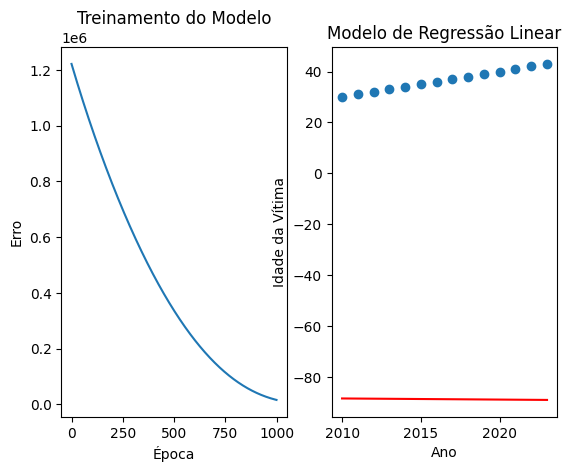

In [51]:
!pip install keras

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Definindo a semente para reprodutibilidade
np.random.seed(2)

# Definindo as dimensões de entrada e saída
input_dim = 1
output_dim = 1

# Definindo o modelo
modelo = Sequential()
modelo.add(Dense(1, input_dim=input_dim, activation='linear'))

# Definindo o otimizador
sgd = Adam(learning_rate=0.00004)  # Corrigido para usar learning_rate

# Compilando o modelo
modelo.compile(loss='mean_squared_error', optimizer=sgd)

# Exibindo o resumo do modelo
modelo.summary()

num_epochs = 1000  # Número de épocas
batch_size = 1  # Corrigido para definir o tamanho do lote corretamente
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)

# Frente do modelo 
face = modelo.layers[0]
x_weights, y_weights = face.get_weights()
print('Parâmetros: x = {:.3f}, y = {:.1f}'.format(x_weights[0][0], y_weights[0]))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Treinamento do Modelo')

yregr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x, y)
plt.plot(x, yregr, 'r')
plt.xlabel('Ano')
plt.ylabel('Idade da Vítima')
plt.title('Modelo de Regressão Linear')

xpred = np.array([2024, 2025, 2026, 2027, 2028, 2029, 2030])
ypred = modelo.predict(xpred)
print('Previsão de Idade da Vítima para os próximos anos:', ypred)


In [ ]:
!pip install keras

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supondo que df_total seja o DataFrame preparado conforme descrito
# Selecionar variáveis preditoras (X) e variável alvo (y)
X = df_total[['Ano']]
y = df_total['Idade da Vítima']

# Dividir os dados em conjuntos de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o modelo
modelo = Sequential()
modelo.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1, activation='linear'))

# Definindo o otimizador
adam = Adam(learning_rate=0.001)

# Compilando o modelo
modelo.compile(loss='mean_squared_error', optimizer=adam)

# Treinando o modelo
modelo.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Médio Absoluto (MAE): {mae}')
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R^2): {r2}')

# Exibir previsões comparadas com os valores reais
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred.flatten()})
print(resultados)


ModuleNotFoundError: No module named 'sklearn'